In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error Loss
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Training the Neural Network
def train(X, y, hidden_layer_neurons, epochs, learning_rate):
    # Initialize weights randomly with mean 0
    input_size = X.shape[1]
    output_size = y.shape[1]
    
    # Weights for input to hidden layer
    W1 = np.random.randn(input_size, hidden_layer_neurons)
    # Weights for hidden layer to output
    W2 = np.random.randn(hidden_layer_neurons, output_size)

    # Training the network
    for epoch in range(epochs):
        # Feedforward
        hidden_layer_input = np.dot(X, W1)
        hidden_layer_output = sigmoid(hidden_layer_input)
        
        output_layer_input = np.dot(hidden_layer_output, W2)
        output_layer_output = sigmoid(output_layer_input)

        # Calculate the error (loss)
        loss = mse_loss(y, output_layer_output)

        # Backpropagation
        # Calculate error in output
        output_error = y - output_layer_output
        output_delta = output_error * sigmoid_derivative(output_layer_output)
        
        # Calculate error in hidden layer
        hidden_error = output_delta.dot(W2.T)
        hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

        # Update the weights
        W2 += hidden_layer_output.T.dot(output_delta) * learning_rate
        W1 += X.T.dot(hidden_delta) * learning_rate

        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f'Epoch {epoch} Loss: {loss}')

    return W1, W2

# Predict function
def predict(X, W1, W2):
    hidden_layer_input = np.dot(X, W1)
    hidden_layer_output = sigmoid(hidden_layer_input)
    
    output_layer_input = np.dot(hidden_layer_output, W2)
    output_layer_output = sigmoid(output_layer_input)
    
    return output_layer_output

# Example usage
if __name__ == "__main__":
    # Input data (4 samples, 2 features each)
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])

    # Output labels (XOR problem)
    y = np.array([[0],
                  [1],
                  [1],
                  [0]])

    # Train the neural network
    hidden_neurons = 4
    epochs = 10000
    learning_rate = 0.1
    W1, W2 = train(X, y, hidden_neurons, epochs, learning_rate)

    # Make predictions
    predictions = predict(X, W1, W2)
    print("\nPredictions after training:")
    print(predictions)


Epoch 0 Loss: 0.26708237131886337
Epoch 100 Loss: 0.25394366009294034
Epoch 200 Loss: 0.2523340533023076
Epoch 300 Loss: 0.2512426005478286
Epoch 400 Loss: 0.25036728765016053
Epoch 500 Loss: 0.24957756378902157
Epoch 600 Loss: 0.24877560512604918
Epoch 700 Loss: 0.2478726355905278
Epoch 800 Loss: 0.24677342908472483
Epoch 900 Loss: 0.24536668681393556
Epoch 1000 Loss: 0.2435240767215585
Epoch 1100 Loss: 0.2411131095605032
Epoch 1200 Loss: 0.23802495673776253
Epoch 1300 Loss: 0.23420634486374708
Epoch 1400 Loss: 0.22967641690376156
Epoch 1500 Loss: 0.22451924760832104
Epoch 1600 Loss: 0.21886128460284265
Epoch 1700 Loss: 0.2128484134125685
Epoch 1800 Loss: 0.20662898183189776
Epoch 1900 Loss: 0.20034161628783412
Epoch 2000 Loss: 0.19410585422979287
Epoch 2100 Loss: 0.18801556958620175
Epoch 2200 Loss: 0.18213599530990168
Epoch 2300 Loss: 0.17650441216673116
Epoch 2400 Loss: 0.1711334992920971
Epoch 2500 Loss: 0.1660158283923258
Epoch 2600 Loss: 0.16112810875001063
Epoch 2700 Loss: 0.15

In [5]:
import numpy as np

# a function that applies the network using vectorized operations
def apply_net_vec(y_in):
    global w, b
    z = np.dot(y_in, w.T) + b  # vectorized dot product and bias addition
    return 1 / (1 + np.exp(-z))  # apply sigmoid function

# Input and output layer sizes
N0 = 2  # input layer size
N1 = 1  # output layer size

# Initialize weights and biases
w = np.random.uniform(low=-10, high=+10, size=(N1, N0))  # random weights: N1xN0
b = np.random.uniform(low=-1, high=+1, size=(N1,))  # biases: N1 vector

# Vectorized generation of input values in range [-0.5, 0.5]
M = 50  # picture of size MxM
x = np.linspace(-0.5, 0.5, M)  # generate M evenly spaced values between -0.5 and 0.5
y_in = np.array(np.meshgrid(x, x)).T.reshape(-1, 2)  # create grid of input pairs

# Apply the network to all input pairs in one go
y_out = apply_net_vec(y_in).reshape(M, M)  # apply network and reshape result to MxM


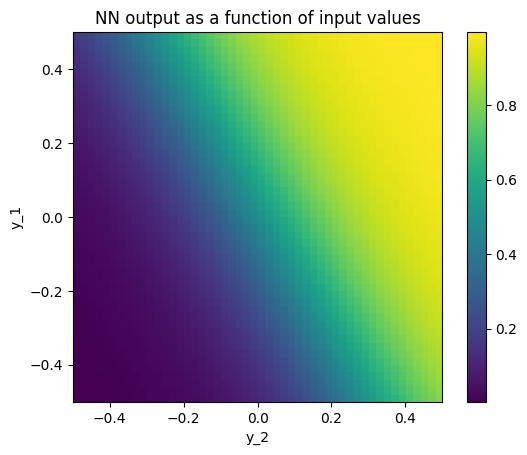

In [13]:
# display image
plt.imshow(y_out,origin='lower',extent=(-0.5,0.5,-0.5,0.5))
plt.colorbar()
plt.title("NN output as a function of input values")
plt.xlabel("y_2")
plt.ylabel("y_1")
plt.show()

In [29]:
import numpy as np

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# A function to apply the network with N hidden layers
def apply_net_vec(y_in, weights, biases, activation=sigmoid):
    # Forward pass through each layer
    a = y_in  # input to the first layer
    for w, b in zip(weights, biases):
        z = np.dot(a, w.T) + b  # z = w*a + b
        a = activation(z)  # apply activation function (e.g., sigmoid)
    return a  # final output

# Network initialization with N hidden layers
def initialize_network(layer_sizes):
    weights = []
    biases = []
    
    for i in range(1, len(layer_sizes)):
        w = np.random.uniform(low=-1, high=1, size=(layer_sizes[i], layer_sizes[i-1]))  # weight matrix
        b = np.random.uniform(low=-1, high=1, size=(layer_sizes[i],))  # bias vector
        weights.append(w)
        biases.append(b)
    
    return weights, biases

# Example usage:

# Define the network architecture
layer_sizes = [2, 30, 3, 1]  # 2 inputs, 2 hidden layers with 5 and 3 neurons, 1 output

# Initialize weights and biases
weights, biases = initialize_network(layer_sizes)

# Input data (50x50 grid)
M = 50
x = np.linspace(-1, 1, M)
y_in = np.array(np.meshgrid(x, x)).T.reshape(-1, 2)  # create a grid of input pairs

# Apply the network with N hidden layers
y_out = apply_net_vec(y_in, weights, biases).reshape(M, M)


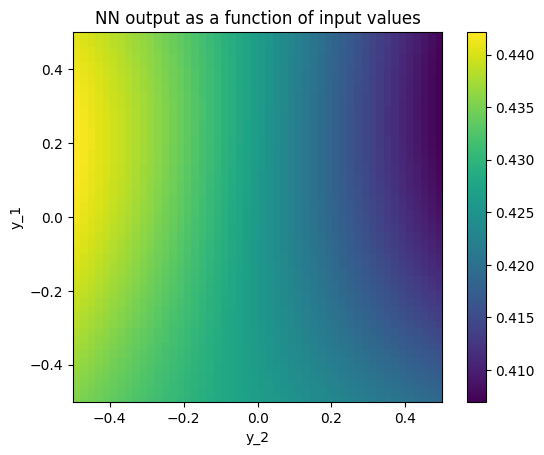

In [30]:
# display image
plt.imshow(y_out,origin='lower',extent=(-0.5,0.5,-0.5,0.5))
plt.colorbar()
plt.title("NN output as a function of input values")
plt.xlabel("y_2")
plt.ylabel("y_1")
plt.show()

In [31]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load and preprocess the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features: 4-dimensional input (sepal length, sepal width, petal length, petal width)
y = iris.target  # Labels: 0, 1, 2 (3 classes)

# For simplicity, convert this to a binary classification (class 0 vs class 1 and 2)
y = (y == 0).astype(int)

# Step 2: Normalize the data (important for neural networks)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define batch size and initialize weights and biases
batch_size = 32  # We will process the data in batches of 32
N0 = X_train.shape[1]  # Input layer size (4 features)
N1 = 5  # Hidden layer size (we choose 5 hidden neurons)
N2 = 1  # Output layer size (binary classification)

# Initialize weights and biases
w1 = np.random.uniform(low=-1, high=1, size=(N0, N1))
b1 = np.random.uniform(low=-1, high=1, size=N1)
w2 = np.random.uniform(low=-1, high=1, size=(N1, N2))
b2 = np.random.uniform(low=-1, high=1, size=N2)

# Step 5: Define the layer and network functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def apply_layer_new(y_in, w, b):
    z = np.dot(y_in, w) + b
    return sigmoid(z)

def apply_net_new(y_in):
    global w1, b1, w2, b2
    y1 = apply_layer_new(y_in, w1, b1)
    y2 = apply_layer_new(y1, w2, b2)
    return y2

# Step 6: Perform batch processing on the training data
def batch_process(X, y, batch_size):
    num_batches = X.shape[0] // batch_size
    y_out = []
    
    for i in range(num_batches):
        X_batch = X[i * batch_size:(i + 1) * batch_size]
        y_batch = y[i * batch_size:(i + 1) * batch_size]
        
        # Apply the network to the current batch
        y_pred = apply_net_new(X_batch)
        y_out.append(y_pred)
    
    return np.vstack(y_out)

# Step 7: Train the network on the training data (without backpropagation for simplicity)
y_train_out = batch_process(X_train, y_train, batch_size)

# Step 8: Evaluate the network on the test data
y_test_out = apply_net_new(X_test)

# Step 9: Display shapes and some results
print("Training predictions shape:", y_train_out.shape)
print("Test predictions shape:", y_test_out.shape)
print("First 5 predictions (Test):", y_test_out[:5].flatten())
print("First 5 actual values (Test):", y_test[:5])


Training predictions shape: (96, 1)
Test predictions shape: (30, 1)
First 5 predictions (Test): [0.59306761 0.54313778 0.60079075 0.57501846 0.62538392]
First 5 actual values (Test): [0 1 0 0 0]
